### This script contains the following:

#### 01. Importing libraries and data  
#### 02. Data cleaning
#### 03. The elbow technique
#### 03. k-means clustering
    Scatterplots
    Conclusions
#### 04. Descriptive statistics
    Conclusions
    What could these results be useful for?

### 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path to project folder
path = r"C:\Users\Acer\Desktop\World Happiness Report\02 Data"

In [4]:
# importing dataframe from 2015 original folder
df_happiness = pd.read_csv(os.path.join(path,'Original Data','2015.csv'),index_col=False)

In [5]:
df_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df_happiness.shape

(158, 12)

### 02. Data cleaning

In [7]:
df_happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df_happiness.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
df_happiness.shape

(158, 12)

In [10]:
# Rename the columns

df_happiness.rename(columns = {'Happiness Rank' : 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Standard Error': 'Standard_error', 'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Life_Expectancy', 'Trust (Government Corruption)': 'Government_Corruption', 'Dystopia Residual': 'Dystopia_Residual'}, inplace = True)

### 03. Elbow technique 

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_happiness['Country'] = label_encoder.fit_transform(df_happiness['Country'])


In [17]:
# Convert a specific column to numeric (if applicable)
df_happiness['Happiness_Rank'] = pd.to_numeric(df_happiness['Happiness_Rank'], errors='coerce')

# Drop columns with non-numeric data
df_happiness = df_happiness.select_dtypes(include=['number'])


In [18]:
# Impute missing values (if applicable)
df_happiness = df_happiness.fillna(df_happiness.mean())


In [20]:
score = [kmeans[i].fit(df_happiness).score(df_happiness) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda4\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Acer\anaconda4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

[-657662.0738942845,
 -406770.624222834,
 -253236.06308378713,
 -160308.72843996395,
 -126577.79071439031,
 -107901.3665920253,
 -92766.04303070126,
 -77522.19221202805,
 -66338.7799716284]

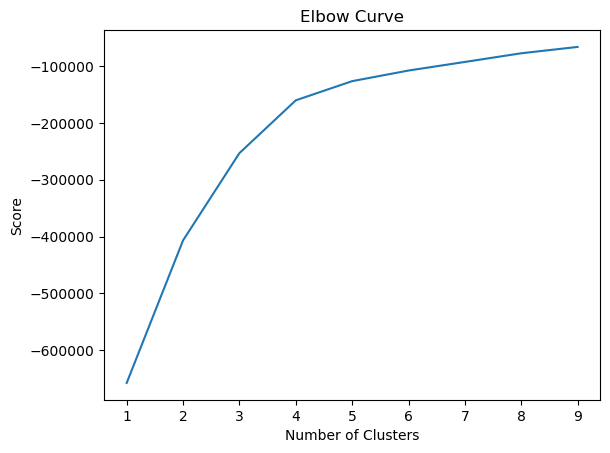

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### By looking at it, the elbow or breaking point is on 3 and 4 on the x axis. And then the curve begins to flatten out on 4. It means the optimal count for my cluster is 4 

### 04. K-means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_happiness)

C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
df_happiness['clusters'] = kmeans.fit_predict(df_happiness)

C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
df_happiness.head()

,Country,Happiness_Rank,Happiness_Score,Standard_error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual,clusters
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1


In [27]:
df_happiness['clusters'].value_counts()

clusters
0    64
2    50
1    44
Name: count, dtype: int64

#### Scatterplots

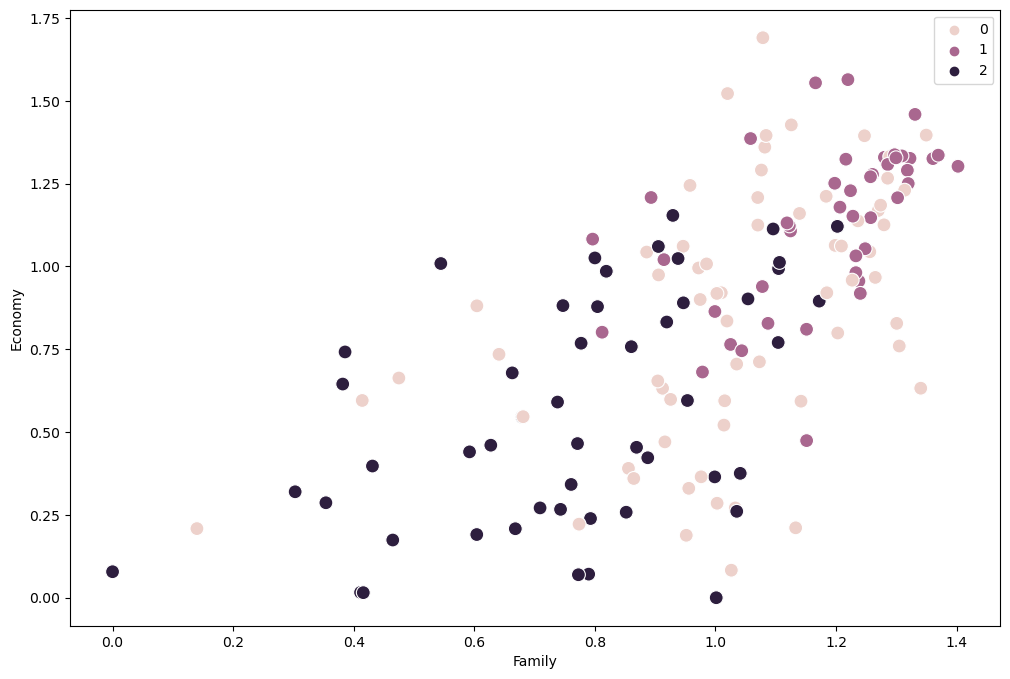

In [43]:
# Plot the clusters for the "Family" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Family'], y=df_happiness['Economy'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family') # Label x-axis.
plt.ylabel('Economy') # Label y-axis.
plt.show()

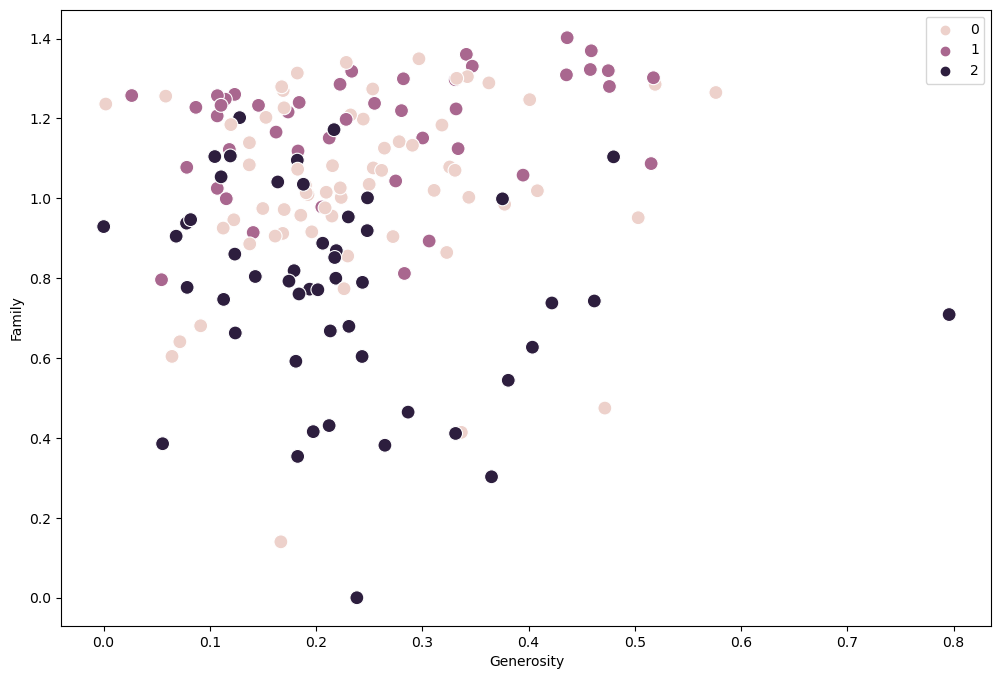

In [37]:
# Plot the clusters for the "Generosity" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Generosity'], y=df_happiness['Family'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

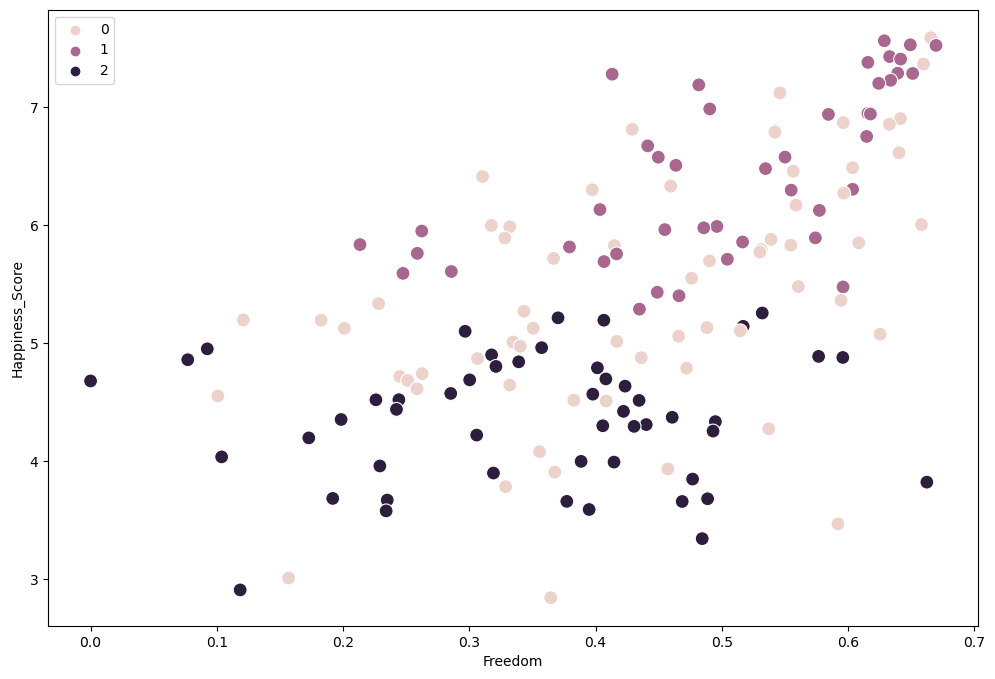

In [44]:
# Plot the clusters for the "Freedom" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Freedom'], y=df_happiness['Happiness_Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Happiness_Score') # Label y-axis.
plt.show()

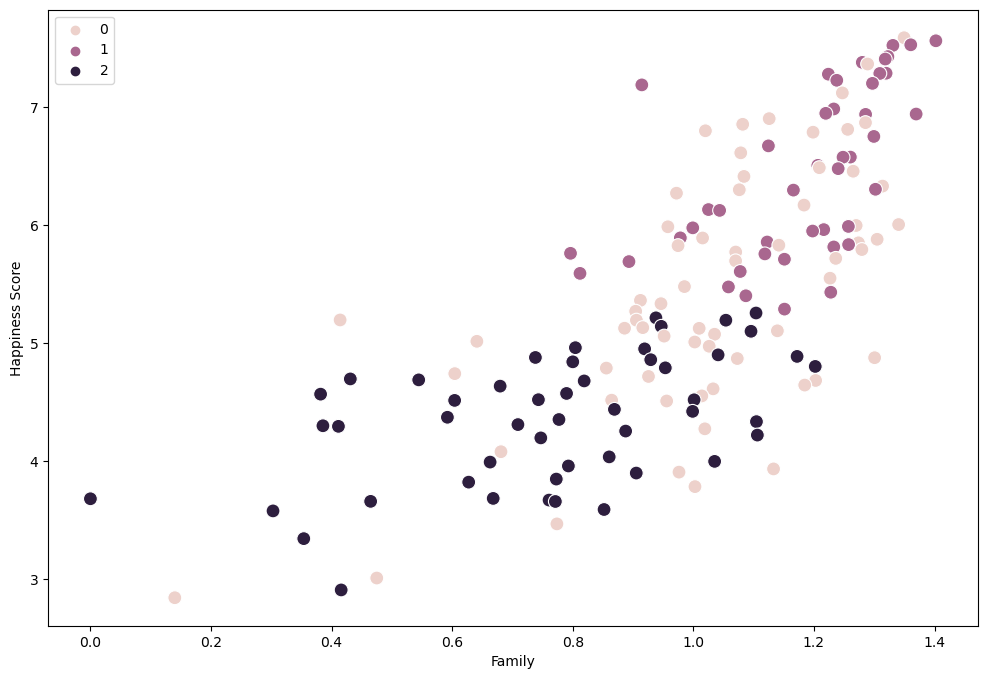

In [41]:
# Plot the clusters for the "Family" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Family'], y=df_happiness['Happiness_Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

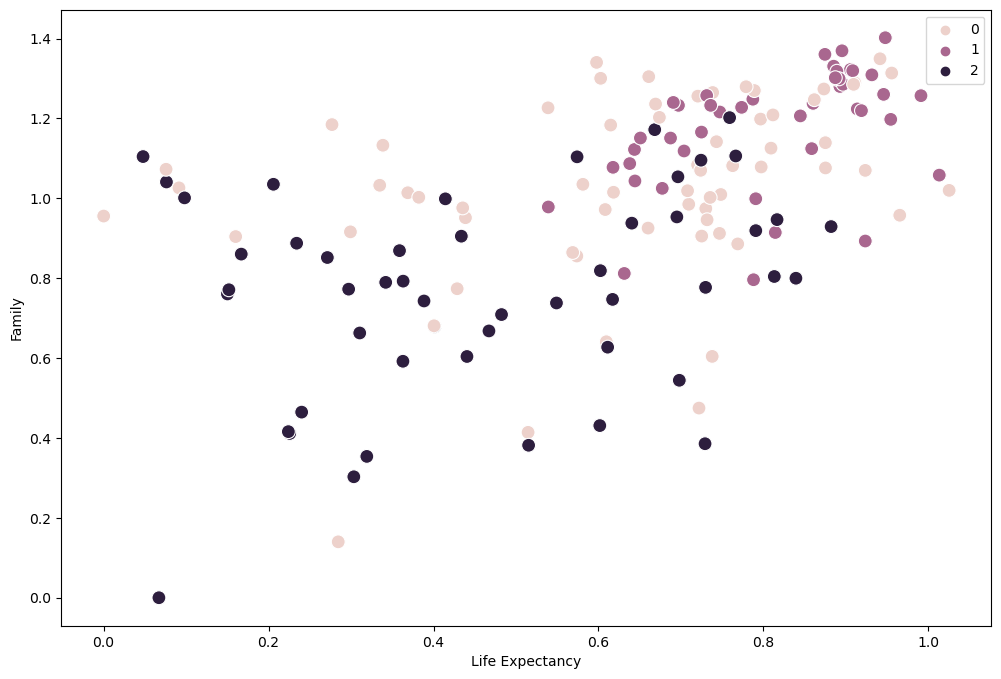

In [40]:
# Plot the clusters for the "Life Expectancy" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness['Life_Expectancy'], y=df_happiness['Family'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

#### Conclusions

##### In the scatterplots above, i can see that dark purple is moslty scattered, while pink and light purple are slightly clustered together. This findings indicate that economy, happiness score, freedom, life expectancy, generosity have some slight effect on family in those countries that determine their happiness rank

### 04. Descritive Statistics

In [47]:
df_happiness.loc[df_happiness['clusters'] == 2, 'cluster'] = 'dark'
df_happiness.loc[df_happiness['clusters'] == 1, 'cluster'] = 'purple'
df_happiness.loc[df_happiness['clusters'] == 0, 'cluster'] = 'pink'

In [48]:
df_happiness.groupby('cluster').agg({'Family':['mean', 'median'], 
                         'Economy':['mean', 'median'], 
                         'Life_Expectancy':['mean', 'median'],
                          'Happiness_Score':['mean', 'median']})


Family             Economy          Life_Expectancy            \
             mean    median      mean   median            mean    median   
cluster                                                                    
dark     0.770509  0.791205  0.566390  0.50546        0.463273  0.437135   
pink     1.032579  1.033960  0.865323  0.91950        0.637205  0.714875   
purple   1.181245  1.225920  1.136125  1.19319        0.809913  0.851700   

        Happiness_Score          
                   mean  median  
cluster                          
dark           4.357240  4.3940  
pink           5.438453  5.3460  
purple         6.441886  6.3895

### Conlusions

##### Based on this statistics, it appears that the purple and dark clusters are the most consistent overall as the margin between the mean,median in all variables are relatively close.  Pink cluster appears to have slight inconsistence in Economy and Life Expentancy variables. 

#### What could these results be useful for?

##### These results of our statitics analysis and all these cluster plots visualisations conclusions and results could be used to contribute to determine happiness rank in these countries. These results could be used to determine increase or decrease in happiness rank in these countries. Ecomonic effect family, family Health lift expectancy, family generosity, family happiness score could be used to determine increase or decrease of happiness rank in these countries


In [51]:
# Export the dataframe to csv file

import os

# Assuming path is the base directory
path = "C:\\Users\\Acer\\Desktop\\World Happiness Report"

# Ensure the 'Prepared Data' directory exists
prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data')
os.makedirs(prepared_data_path, exist_ok=True)

# Save the CSV file to the correct path
df_happiness.to_csv(os.path.join(prepared_data_path, '2015.csv'))
